# Project Proposal E392


### Introduction
Many individuals have been affected not just by health difficulties but also by economic issues as the epidemic has spread over the world in the previous two years. This includes the uncontrollable rise in home prices. The property market, on the other hand, came to a screeching halt in spring 2020 when COVID-19 was declared a global pandemic. This is due to a variety of factors, including lockdowns, work-from-home options, and, of course, health concerns. There are links between Zillow and the CDC statistics that illustrate the impact of the pandemic on the home market. This investigation will show the many types of correlations that may be found and how they are assessed. In this study, I will be comparing the COVID-19 instances in the first 2-3 months to the price increases in homes and apartments.

In [126]:
from scipy.integrate import quad
from scipy.stats import beta
from scipy.stats import linregress
from pandas import DataFrame
import scipy.optimize
from PIL import Image 
import IPython
import pandas as pd
!pip install pypng
!pip install --upgrade pandas-datareader
from pandas_datareader import data
import numpy as np
import os
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

### Research Question and Why It Is Important
**Research Question**: 
>Did house prices evolve differently during the last two years in areas that were hardest hit by Covid in the early days (March 2020 to July 2020)?

Apart from being a significant source of vulnerabilities and crises, the housing market is also a vital determinant of economic development. In the United States, residences are frequently a significant source of household wealth, and housing development offers broad employment. Housing accounts for a major share of all economic activity at the aggregate level, and changes in the housing market can have broader economic implications. According to the Congressional Research Service, "...spending within the housing market accounted for 17.5% of GDP in 2020. (2022)" Housing insecurity grew when Covid arrived in the United States, but other housing market determinants remained stable. As a result, it contributed to increased prices as the market's supply of house inventory shrank.

According to the Congressional Research Service, however, housing inventory was already low when the pandemic began. It is vital to highlight that the pandemic has a role in worsening the scarcity, allowing many homeowners to postpone selling their homes. This would allow for an increase in case supply the following year.

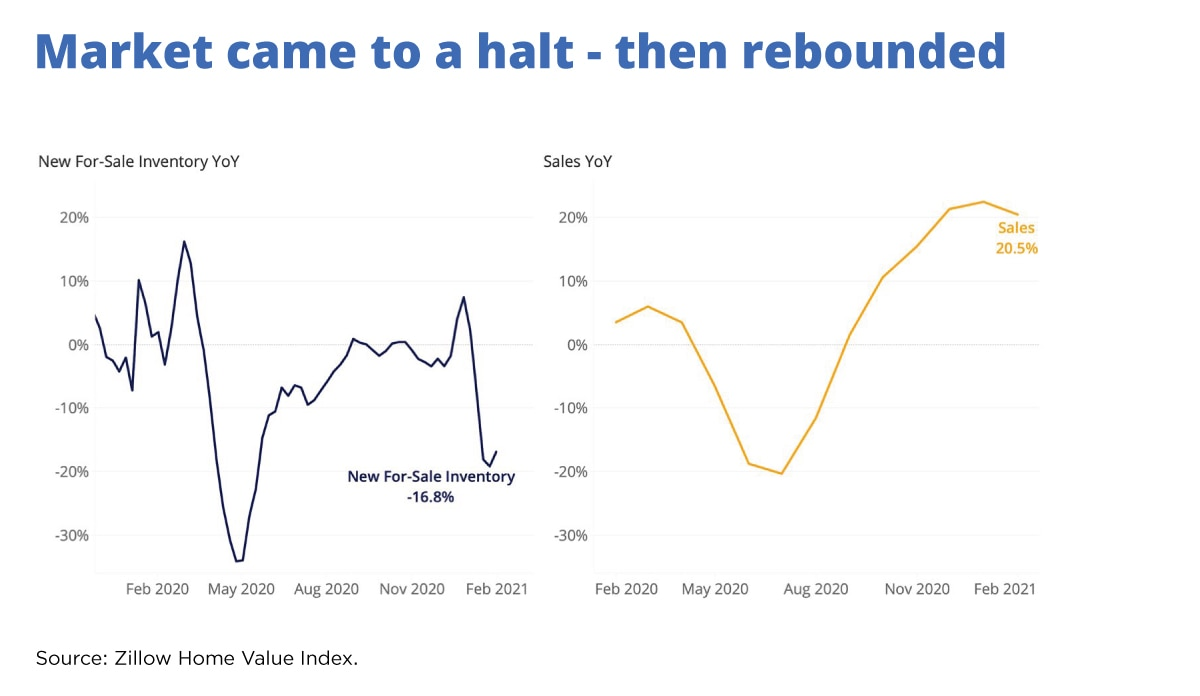

As shown on the above image, the housing market was on the rise during March before coming to  halt due to the pandemic. After the lockdowns were lifted, the market starts to grow rapidly. This leads to the curiosity of wanting to dive deeper into specific regions and the effect that the pandemic has on those areas. 

The COVID-19 outbreak resulted in unusually rapid but massive changes in various data series, as well as large government policy adjustments, making economic and housing market analyses exceedingly complicated and ambiguous. For example, The CARES act was enacted at the federal level in order to help with renters and homeowners to help with their dues (U.S. Dept. of Housing & Urban Development, 2022). 

What is the significance of this? While the cause and effect is illustrated by this nearly hazy data, there are other aspects that appear to be missed. Such as the hardest-hit areas, which are coping not just with rising home prices but also rising rental costs. Examining the data from the COVID-19 regions with the greatest effect not only aids in comprehending the fundamental economic situation, but also allows one to make decisions that will aid in the prevention of future crises.Using COVID-19 data as well as different time series of housing market records, this study will look at specific places that were impacted more than the general record of relationship observed between the two. Rental datasets will be utilized as necessary to acquire insights into whether or not the pricing evolves differently.

### Approach

To properly comprehend the strong association between the two variables, many datasets were collected. The primary datasets were gathered from Zillow, the Centers for Disease Control and Prevention, and the United States Department of Housing and Urban Development. First, COVID data from the CDC was gathered in order to assess and visualize the pandemic's most affected locations. In addition, various data points were gathered from the Zillow web database. The datasets span from single-family pricing to housing inventories to rental expenses dating back to the year 2000. 

Secondary data was used for the qualitative portion of the investigation. The Congressional Research Service and the U.S. Department of Housing and Urban Development are the primary sources. These two sources were mostly used to compare and support the findings of this investigation. 
Data from each location was chosen to highlight the regions with the greatest effect from the outbreak. The Southwest, Pacific, and Midwest were among the locations extracted and used for analsis in this study.

To visualize each dataset, multiple types of charts and graphs were constructed. The states and dates of confirmed instances were utilized so that the housing market could be compared throughout the same time period. The rental cost dataset was used to compare and contrast the housing market and epidemic, as well as a way to better answer the hypothesis question. 

Secondary data are utilized to gain a better insight of the results of data extraction and visualization. With bigger datasets, it might be difficult to correctly depict what is relevant. However, the downloaded materials and usage of secondary data highlighted throughout this research can give a more in-depth knowledge of the housing sector and its relevance to the economy.


### Results


***COVID-19 Data***

To begin, COVID-19 data was taken and shown from the Centers for Disease Control and Prevention website. Each of the three regions' states with the greatest number of covid cases will be examined. 

-California, Arizona, Nevada, and Hawaii are all part of the Pacific area. Arizona and Nevada will be utilized as comparative states for the purposes of this study. According to the data, there were 174,062 confirmed cases in Arizona from March 2020 to July 2020. In Nevada, there were around 6,602 confirmed cases. 

-The southwest area encompasses Arkansas, Louisiana, New Mexico, Oklahoma, and Texas. From March through July, the states having the highest case rates are Louisiana and Texas. By the end of July, Louisiana had 116,280 confirmed cases, while Texas had 420,946 confirmed cases. 

-Among the Midwest states, Michigan and Illinois had the most confirmed cases, with 166,566 and 180,118 cases reported, respectively, at the end of July. 

These states were chosen in order to achieve better results in comparing to the housing market.

In [127]:
pwd

'/Users/NoriShan/Project Proposal'

In [160]:
df1 = pd.read_csv('United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv')   
df.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,12/01/2021,ND,163565,135705.0,27860.0,589,220.0,1907,NaN,NaN,9,0.0,12/02/2021 02:35:20 PM,Agree,Not agree
1,12/10/2020,WA,197450,NaN,NaN,3018,500.0,2850,NaN,NaN,-166,0.0,12/12/2020 12:00:00 AM,NaN,NaN
2,08/17/2020,MD,100715,NaN,NaN,503,0.0,3765,3616.0,149.0,3,0.0,08/19/2020 12:00:00 AM,NaN,Agree
3,03/28/2022,VT,107785,NaN,NaN,467,35.0,585,NaN,NaN,0,0.0,03/29/2022 01:30:11 PM,Not agree,Not agree
4,03/18/2020,ME,44,44.0,0.0,12,0.0,0,0.0,0.0,0,0.0,03/20/2020 12:00:00 AM,Agree,Agree


In [129]:
fig = plt.figure(figsize= (8.4))
ax1 = plt.sublot(1)
plt.show()

TypeError: Value after * must be an iterable, not float

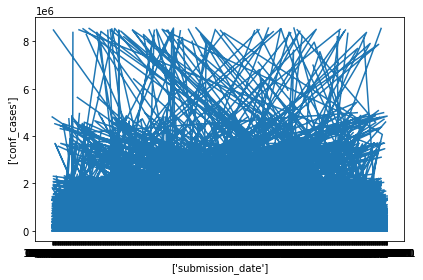

In [152]:
#Confirmed cases by date
df1 = pd.read_csv('United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv')

x = df['submission_date']
y = df['conf_cases']

plt.xlabel(['submission_date'])
plt.ylabel(['conf_cases'])
plt.plot(x, y)
           

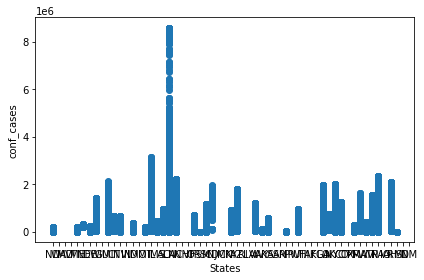

In [145]:
x = df['state']
y = df['submission_date']
v = df ['conf_cases']
plt.xlabel('States')
plt.ylabel('conf_cases')
plt.scatter(x,v)

This data shows the death counts by each ending week. As seen in the chart, there is a noticable difference from March to July in 2020.

***Zillow Single Home Value Data***

The table below shows average price for single home at the end of each month catagoried by each states. For the purpose of this analysis, states with the highest covid cases mentioned above will be used for comparison. 


For the Pacific region, ***Arizona*** average single price was 279,388.0 dollars on March 31st, 2020 and by the end of July 2020, the average home price was reported as 289,115.0 US dollars. 
As for ***Nevada***, the recorded single house price from March to July 2020 was 319,443.0 and 320,195.0 in U.S. dollars.

For the Southwest Region, ***Louisiana*** reported to have single home values of 176,242.0 on March 31st, 2020 and $177,306.0 by July 31st, 2020. In contrast, ***Texas*** single home values were 218,142.0 and 220,797.0 from March to July 31st.

As for the Midwest, ***Michigan*** single home value from March to July 2020 were 173916.0 and $175, 765.0, recorded in U.S. dollars. ***Illinios*** showed a similar slow jump of home values; 209,067.0 on March 2020 and 209,940.0 by the end of July 2020. 

Looking at this report, all three regions showed a low correlation between covid and housing market. Hence, looking at the housing values modern day way further help with answer the question whether these regions had higher house prices or not.

In [163]:
#Housing price of single home (time-series)
df3 = pd.read_csv('Zillow file single home time series.csv')
df3

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31
0,9,0,California,State,CA,205366.0,206236.0,207321.0,209599.0,212029.0,...,691869.0,711317.0,725734.0,736124.0,741355.0,746951.0,753880.0,764358.0,776841.0,792230.0
1,54,1,Texas,State,TX,114548.0,114667.0,114704.0,114909.0,114954.0,...,252403.0,258086.0,263790.0,268686.0,272998.0,276674.0,280978.0,285684.0,291168.0,296622.0
2,43,2,New York,State,NY,138800.0,139486.0,140056.0,141270.0,142357.0,...,323751.0,329677.0,334394.0,338209.0,341106.0,343933.0,346783.0,350003.0,353671.0,358191.0
3,14,3,Florida,State,FL,120434.0,120806.0,121192.0,121927.0,122620.0,...,310237.0,318754.0,327357.0,335694.0,343456.0,351173.0,358348.0,366301.0,374609.0,384693.0
4,21,4,Illinois,State,IL,147940.0,148259.0,148694.0,149549.0,150429.0,...,234136.0,237719.0,241245.0,243888.0,246226.0,248573.0,251183.0,253637.0,256107.0,258872.0
5,47,5,Pennsylvania,State,PA,106496.0,106854.0,107147.0,107713.0,108198.0,...,236078.0,239585.0,242406.0,244591.0,246599.0,248486.0,250755.0,253342.0,256165.0,258835.0
6,44,6,Ohio,State,OH,110634.0,110804.0,110979.0,111432.0,111977.0,...,184324.0,186955.0,189302.0,191385.0,193127.0,194854.0,196976.0,199325.0,201949.0,204237.0
7,30,7,Michigan,State,MI,119863.0,120063.0,120447.0,121132.0,121970.0,...,202979.0,206497.0,209611.0,211902.0,214121.0,215743.0,217840.0,220278.0,223053.0,225759.0
8,16,8,Georgia,State,GA,131924.0,132361.0,132797.0,133672.0,134507.0,...,249990.0,255578.0,261219.0,266583.0,272070.0,277598.0,283979.0,290217.0,296417.0,301987.0
9,36,9,North Carolina,State,NC,135295.0,135624.0,135905.0,136490.0,137044.0,...,252683.0,258547.0,264722.0,270543.0,275798.0,280522.0,285823.0,291533.0,297749.0,303839.0


***Zillow Housing Inventory in the Metropolitan Areas***

As stated in the title, the table below are records of housing inventory from the year of 2000 to present day. For an analysis like, it is important examine such data in order to better understand the results. Note, this data only shows the metropolitan area of each city which will be added up. However, it it will be affective in terms comparing housing market to the pandemic. Housing inventory for each of the states with the highest confirmed cases are as explained below:

***Pacific Region:*** Arizona and Neveda had a total of 35,281.0 and 14702.0 on March 2020 and on July 2020, the inventory reduced to 33,604.0 and 15714.0 of total amount of houses recorded in inventory.

***Southwest Region:*** Louisian and Texas had a total of 17,917.0 and 134,435.0 on March 2020 and on July 2020, the inventory reduced for Louisiana to 16,943.0 while Texas jumped up to 137,288.0 total amount of houses recorded in inventory.

***Midwest Region:*** Michigan and Illinois had a total of 37,332.0 and 62,251.0 on March 2020 and on July 2020. However, the inventory increased to 40,990.0 and 64,533.0, respectively.

This result showed that while certain regions had a small decrease in housing inventory, there were other regions who had medium increase as well. Comparing to the covid cases reviewed above, the  inventory list is the result of how fast COVID spread through each region. The region with the lowest amount of confirmed cases had lower inventory which means that people were still buying and selling houses as it was not as severe compared to the other regions with higher confirmed cases and higher housing inventory. The regions with higher inventory means that people were off on selling their houses due the crisis and lockdowns. However, the present inventory is more likely to be different hence the change in the amount of COVID-19 cases across the nation increases. 


In [164]:
#Housing inventory of United States and the Metropolitan Statistical Areas
df2 = pd.read_csv('Metro_invt_fs_uc_sfrcondo_sm_month.csv')   
df2

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,...,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31
0,102001,0,United States,Country,NaN,1426017.0,1383431.0,1440503.0,1527556.0,1629266.0,...,1026119.0,1072163.0,1118351.0,1137383.0,1128132.0,1064278.0,950606.0,825784.0,727190.0,717902.0
1,394913,1,"New York, NY",Msa,NY,68860.0,68409.0,72901.0,79816.0,85836.0,...,63522.0,65031.0,65249.0,63654.0,61927.0,58343.0,52251.0,44810.0,39664.0,39709.0
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,20024.0,19857.0,21813.0,23728.0,25694.0,...,20749.0,21291.0,21700.0,21472.0,20506.0,18639.0,15871.0,13576.0,12630.0,13746.0
3,394463,3,"Chicago, IL",Msa,IL,42654.0,40975.0,44568.0,49085.0,53596.0,...,37860.0,39848.0,41280.0,41418.0,40445.0,37324.0,32315.0,26994.0,23211.0,23059.0
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,24279.0,23203.0,24346.0,26750.0,29540.0,...,23863.0,25023.0,26150.0,26549.0,25936.0,24408.0,21979.0,19210.0,16549.0,15949.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,394767,929,"Lamesa, TX",Msa,TX,28.0,32.0,35.0,36.0,37.0,...,39.0,38.0,37.0,35.0,33.0,32.0,32.0,32.0,31.0,28.0
913,753874,930,"Craig, CO",Msa,CO,120.0,112.0,110.0,112.0,121.0,...,73.0,69.0,74.0,80.0,86.0,82.0,72.0,57.0,47.0,45.0
914,394968,931,"Pecos, TX",Msa,TX,13.0,14.0,15.0,14.0,15.0,...,25.0,24.0,25.0,26.0,28.0,29.0,30.0,28.0,23.0,20.0
915,395188,932,"Vernon, TX",Msa,TX,19.0,20.0,21.0,27.0,32.0,...,15.0,19.0,23.0,26.0,26.0,26.0,25.0,24.0,22.0,22.0


In [35]:
plt.style.use('bmh')
df = pd.read_csv('United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv')

x = df['']

df = pd.DataFrame(d)

df['conf_cases'].plot()

plt.show()

KeyError: "None of [Index(['Submission Date', 'State', 'conf_cases', 'tot_cases'], dtype='object')] are in the [columns]"

The graph below is provided by the CDC in which it shows the confirmed cases since 2020 to present day. This can be compared to the housing prices throughout the the last to years. When the lockdowns were lifted, people are more likely to sell their home which causes the price to rise. For example, In the Midwest region, the housing inventory decreased from 40,990 in July 2020 to 20,135 in April 2022 for Michigan while Illinois decreased from 64,533 to 30,206 in the same order. 

As for the house prices, all the regions had an increase in since July 2020 to March 2022. For example, the Arizona houses increased from 289,115.0 to 432,655.0 while Nevada houses increased from 320,195.0 to 461,529.0. 

In the Midwest region, the same trend can be depicted. Illinois single home value increased from 209,940.0 to 258,872.0 while Michigan home value increased from 175,765.0 to 225,759.0. 

As for Southwest, Texas the home value increased from 220797.0 in July 2020 to 296,622 in March 2022. While Louisiana single home value increased from 177,306.0 to 208,966.

This comparison was done by comparing covid cases and housing value from March 2020 to MArch 2022.

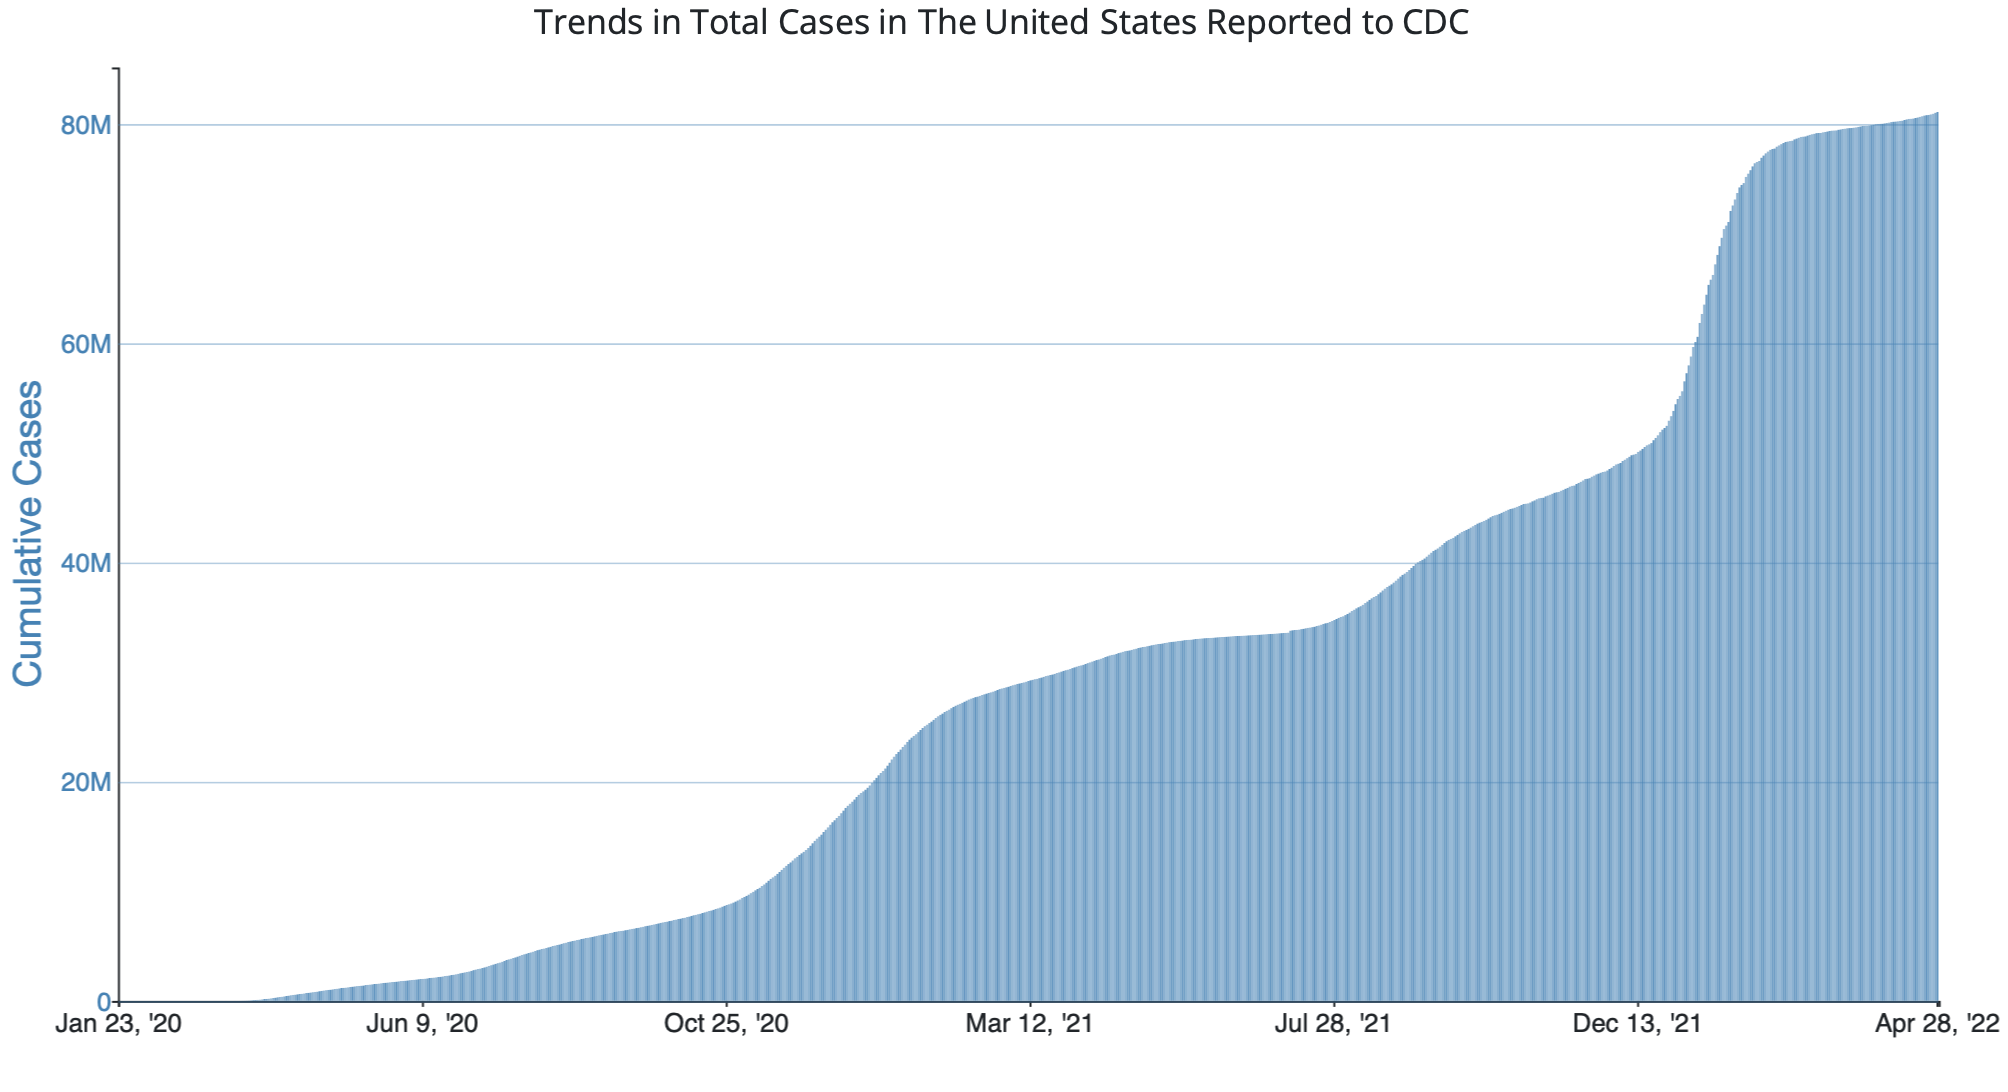

The two charts below shows the comparison of inventory list by months and states within the months of March to July. As one can see, each states varies by the dates and is spreaded across the months. 

<BarContainer object of 51 artists>

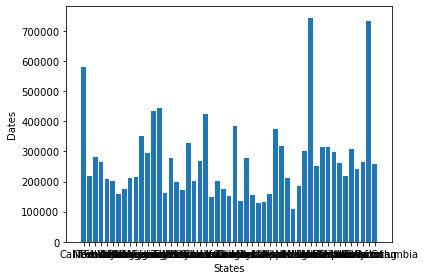

In [133]:
#Zillow chart
x =data['RegionName']
y = data['2020-03-31']
plt.xlabel("States")
plt.ylabel("Dates")
plt.bar(x, y)

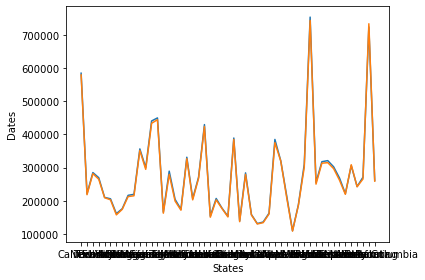

In [146]:
#Comparison of home prices fro March to July
x =data['RegionName']
y = data['2020-07-31']
h = data ['2020-03-31']
plt.xlabel("States")
plt.ylabel("Dates")
plt.plot(x, y, h)

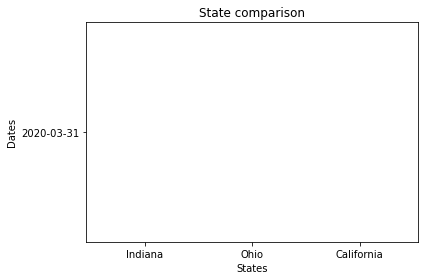

In [136]:
x = ['Indiana','Ohio', 'California']
y = ['2020-03-31']
plt.bar(x,y)
plt.xlabel("States")
plt.ylabel("Dates")
plt.title("State comparison")
plt.show()

In [59]:
fig = plt.figure()
myaxes = fig.add_axes([200000, 400000, 600000])
myaxes.plot(March, State, 'r', 3, w =4,label = 'March')
myaxes.plot(July, State, 'b', 3, w=4)
myaxes.set_xlabel('Months')
myaxes.set_ylabel("State")
myaxes.set_title('Covid month house price by states')
myaxes.legend()


TypeError: from_bounds() missing 1 required positional argument: 'height'

<Figure size 540x252 with 0 Axes>

In [147]:
def Single_Family_Home(SizeRank, StateName, RegionName):

    url = 'https://files.zillowstatic.com/research/public_csvs/zhvi/State_zhvi_uc_sfr_tier_0.33_0.67_sm_sa_month.csv?t=1651172337'
    params = {
        'address': address,
        'citystatezip': zipcode,
        'zws-id': self.api_key,
        'rentzestimate': True 
    }
    return self.get_data(url, params)

***Rental Cost Comparison***

The table below shows the rental cost of all types of home. While this data may play the significan role in this analysis, it can be helpful to further proof that there is a difference of house prices between each regions. In case, Southwest and Pacific region will be utilized for comparison. Note, the renter cost is based on major city of each state. For example, San Antonio, Texas rent increased from $1,189 to $1417 while New Orleans, Louisian rent increased from $1,239 to $1,517. The same trend can be seen with Phoenix, Arizona where the rent increased from $1,411 to $1,921. As for Las Vegas, Nevada the rent increased from $1,370 to $1,828 per month from July 2020 to March 2022.

While a wider range of cities can provide more accurate result, one can see that major regions, states, and cities are impacted by the pandemic in terms of not only house prices but as well as monthyl rent. 

In [159]:
#Rental cost in the Metropolitan area
data = pd.read_csv('Rental Metro_ZORI_AllHomesPlusMultifamily_Smoothed.csv')
data

,RegionID,RegionName,SizeRank,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,...,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03
0,102001,United States,0,1265.0,1275,1276.0,1283,1296,1306,1315,...,1717,1752,1786,1810.0,1827.0,1845,1861,1867,1891,1904.0
1,394913,"New York, NY",1,2242.0,2270,2277.0,2283,2315,2333,2351,...,2574,2635,2679,2719.0,2747.0,2772,2804,2836,2888,2934.0
2,753899,"Los Angeles-Long Beach-Anaheim, CA",2,1813.0,1842,1830.0,1838,1861,1880,1899,...,2564,2608,2662,2698.0,2726.0,2750,2774,2793,2827,2853.0
3,394463,"Chicago, IL",3,1432.0,1444,1446.0,1450,1466,1480,1489,...,1724,1744,1763,1769.0,1774.0,1779,1793,1807,1821,1842.0
4,394514,"Dallas-Fort Worth, TX",4,1085.0,1111,1116.0,1132,1127,1130,1134,...,1540,1581,1617,1640.0,1653.0,1671,1681,1689,1705,1709.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,394405,"Boulder, CO",162,1390.0,1424,1390.0,1379,1392,1425,1439,...,1920,1943,1975,1981.0,1984.0,1990,2012,2037,2051,2084.0
104,394483,"College Station, TX",192,1077.0,1125,1101.0,1114,1118,1129,1132,...,1340,1367,1392,1362.0,1382.0,1426,1441,1451,1467,1479.0
105,394623,"Gainesville, GA",229,894.0,933,947.0,939,940,945,936,...,1478,1519,1567,1542.0,1541.0,1572,1593,1603,1601,1609.0
106,395098,"Sierra Vista, AZ",309,877.0,922,903.0,895,901,909,909,...,1208,1219,1189,1256.0,1320.0,1313,1294,1196,1244,NaN


### Conclusion

To summarize the big takeway of this analysis, it can be seen that the Pacific and Midwest region had the highest rate house price increasement. 

By comparing various time series data from reliable sources, this analysis proves that house prices evolve differently in the regions that were most impacted by the pandemic. While there are certain areas in which more data can be utilized to further provide a more accurate result, this research still is still sufficient to conclude that the pandemic has an impact on housing market and the crucial role it plays in todays economy. 

While this may illustrate the housing market from a crisis, one should that there can be other factors that plays into how house prices evolved within the last two years. Howfast each region recovered from the virus, how slow or fast it spread, and psychological part of homeowners are just some example of what might affect the house prices.

As reported by the CRS, the housing market remained strong depsise the housing insecurity the pandemic has brought. This can mean that there are other factors that has lead to the increase in house prices in the last two years. Such reason maybe due to employment, housing market conditions before the pandemic, and/or household networth. Nonetheless, house prices have greatly evolve in the last year, especially, since March 2020. 

The COVID-19 virus has caused considerable wide and rapid changes in various data series, as well as significant governmental responses, making analysis of the economic and housing markets highly difficult and ambiguous. With that being said, more time and wider range of data can be a useful resource to this analysis in order provide a more thorough result.